For predicting the lowest and highest temperature, I would consider using a regression model. because my data have a lot of features, a complex model like a Random Forest or Gradient Boosting could work well in this case. But I will also test a 3rd model, a linear regression to see how it goes. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the data
data = pd.read_csv('weather_data_2024.csv')

In [3]:
# Examine first few rows after data preprocessing
print(data.head())

       Date  Month  Max_Temperature_(°F)  Avg_Temperature_(°F)  \
0  1/1/2024      1                    52                  47.3   
1  1/2/2024      1                    51                  49.6   
2  1/3/2024      1                    50                  48.2   
3  1/4/2024      1                    48                  46.7   
4  1/5/2024      1                    46                  45.1   

   Low_Temperature_(°F)  Max_Dew Point_(°F)  Avg_Dew Point_(°F)  \
0                    43                  49                41.8   
1                    47                  49                47.0   
2                    46                  47                45.2   
3                    45                  44                41.0   
4                    43                  41                39.3   

   Low_Dew Point_(°F)  Max_Humidity_(%)  Avg_Humidity_(%)  Low_Humidity_(%)  \
0                  34                98              81.9                62   
1                  45                95   

In [4]:
# Select features
features = ['Month', 'Avg_Temperature_(°F)', 'Max_Dew Point_(°F)', 'Avg_Dew Point_(°F)', 'Max_Humidity_(%)', 'Avg_Humidity_(%)', 'Max_WindSpeed_(mph)', 'Avg_WindSpeed_(mph)', 'Max_Pressure_(in)', 'Avg_Pressure_(in)', 'Precipitation_(in)']
X = data[features]

In [5]:
# Assuming we have a target variable y_max and y_min
y_max = data['Max_Temperature_(°F)']
y_min = data['Low_Temperature_(°F)']

In [6]:
# Split data into training and validation data, for both features and target
from sklearn.model_selection import train_test_split
train_X, val_X, train_y_max, val_y_max = train_test_split(X, y_max, random_state = 0)
train_X, val_X, train_y_min, val_y_min = train_test_split(X, y_min, random_state = 0)

In [7]:
# Assuming we have a model called model_max and model_min
from sklearn.ensemble import RandomForestRegressor
model_max = RandomForestRegressor(random_state=1)
model_min = RandomForestRegressor(random_state=1)

In [8]:
# Fit model
model_max.fit(train_X, train_y_max)
model_min.fit(train_X, train_y_min)

RandomForestRegressor(random_state=1)

In [9]:
# Get predicted temperatures on validation data
val_predictions_max = model_max.predict(val_X)
val_predictions_min = model_min.predict(val_X)

In [10]:
# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error for Max Temperature: ", mean_absolute_error(val_y_max, val_predictions_max))
print("Mean Absolute Error for Min Temperature: ", mean_absolute_error(val_y_min, val_predictions_min))

Mean Absolute Error for Max Temperature:  1.1939130434782599
Mean Absolute Error for Min Temperature:  6.626521739130434


MAE represents the average of the absolute differences between the predicted and actual temperature values. It indicates how far off, on average, this model's predictions are from the true values, expressed in the same units as the target variable (degrees in my case).
Lower MAE is generally better, implying my model is closer to capturing the actual temperatures on average.

Max Temperature MAE (1.19) suggests an average absolute error of 1.19 degrees Celsius for maximum temperature predictions. It signifies that, on average, my model's predictions for maximum temperature deviate from the actual values by 1.19 degrees.
Min Temperature MAE (6.63) indicates a noticeably higher average absolute error of 6.63 degrees Celsius for minimum temperature predictions. Compared to the max temperature, my model seems to have more difficulty predicting minimum temperatures accurately.

What are the Possible Reasons for the Difference?

The distribution of maximum and minimum temperatures in my data might be different. Minimum temperatures might have a wider range or more outliers, making them harder to predict accurately. Some features in my data might be more informative for predicting maximum temperatures compared to minimum temperatures. let's plot to visually see what are those more important features.

In [11]:
import matplotlib.pyplot as plt

C:\Users\I346462\AppData\Local\Temp\ipykernel_22152\784675894.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([val_y_max.min(), val_y_max.max()], [val_y_max.min(), val_y_max.max()], 'k--', lw=2, color='red')


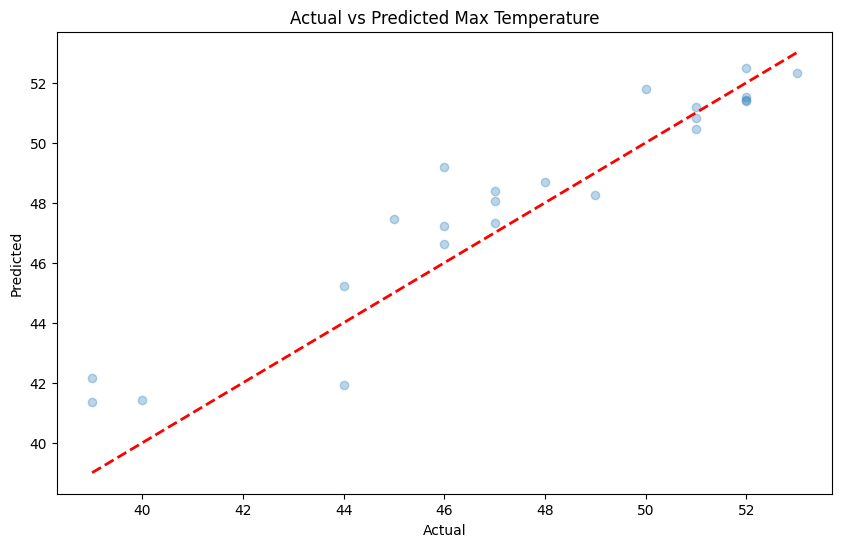

In [12]:
# Plotting actual vs predicted values for Max Temperature
plt.figure(figsize=(10,6))
plt.scatter(val_y_max, val_predictions_max, alpha=0.3)
plt.plot([val_y_max.min(), val_y_max.max()], [val_y_max.min(), val_y_max.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Max Temperature')
plt.show()

C:\Users\I346462\AppData\Local\Temp\ipykernel_22152\1758575874.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([val_y_min.min(), val_y_min.max()], [val_y_min.min(), val_y_min.max()], 'k--', lw=2, color='red')


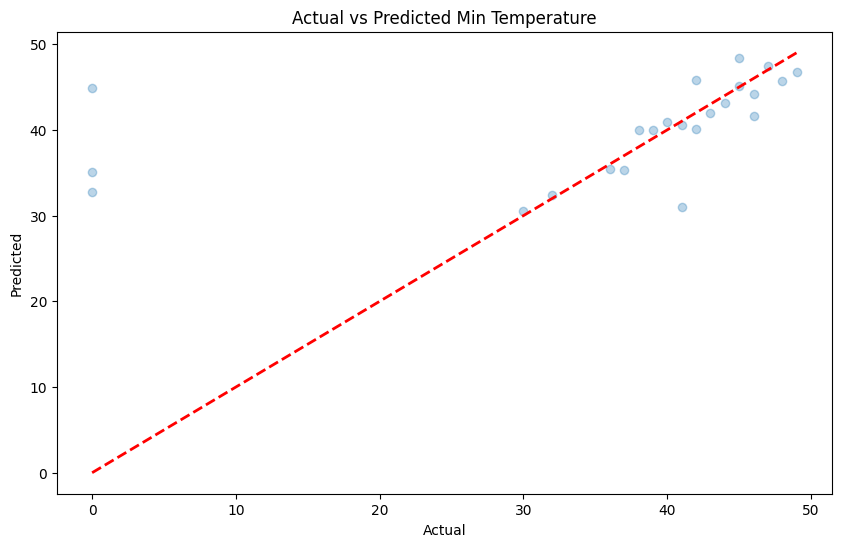

In [13]:
# Plotting actual vs predicted values for Min Temperature
plt.figure(figsize=(10,6))
plt.scatter(val_y_min, val_predictions_min, alpha=0.3)
plt.plot([val_y_min.min(), val_y_min.max()], [val_y_min.min(), val_y_min.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Min Temperature')
plt.show()

In these plots, the red line represents a perfect prediction. The closer the scatter points are to this line, the better the prediction.

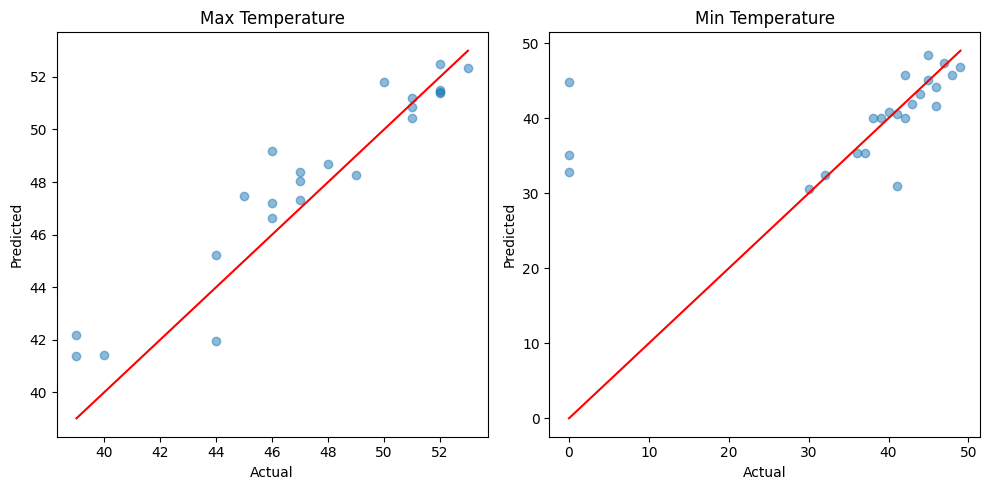

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(val_y_max, val_predictions_max, alpha=0.5)
plt.title('Max Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(val_y_max), max(val_y_max)], [min(val_y_max), max(val_y_max)], color='red') # y=x line

plt.subplot(1, 2, 2)
plt.scatter(val_y_min, val_predictions_min, alpha=0.5)
plt.title('Min Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(val_y_min), max(val_y_min)], [min(val_y_min), max(val_y_min)], color='red') # y=x line

plt.tight_layout()
plt.show()

**Histogram of residuals**: This plot help understand the distribution of the residuals (i.e., the differences between the actual and predicted values). Ideally, the residuals should be normally distributed around zero

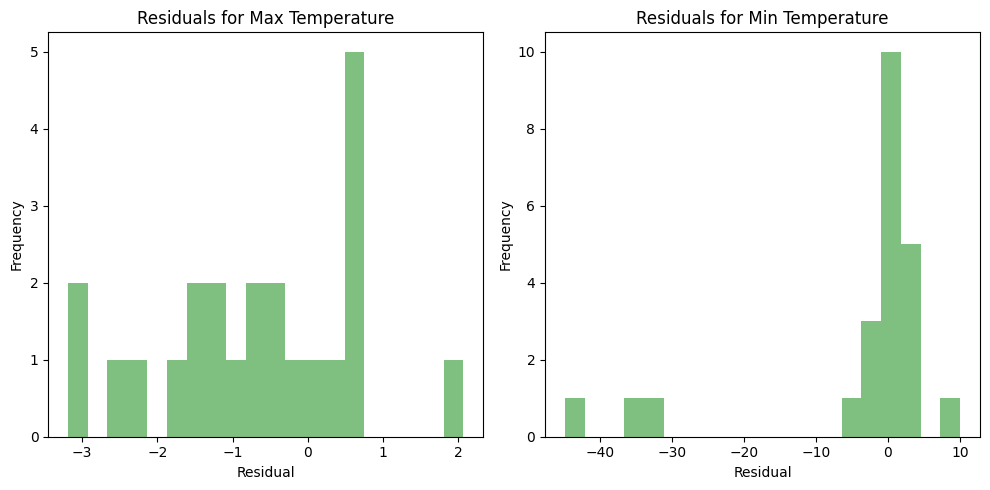

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(val_y_max - val_predictions_max, bins=20, alpha=0.5, color='g')
plt.title('Residuals for Max Temperature')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(val_y_min - val_predictions_min, bins=20, alpha=0.5, color='g')
plt.title('Residuals for Min Temperature')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Feature importance plot**: This plot help understand which features are most important for my model's predictions.

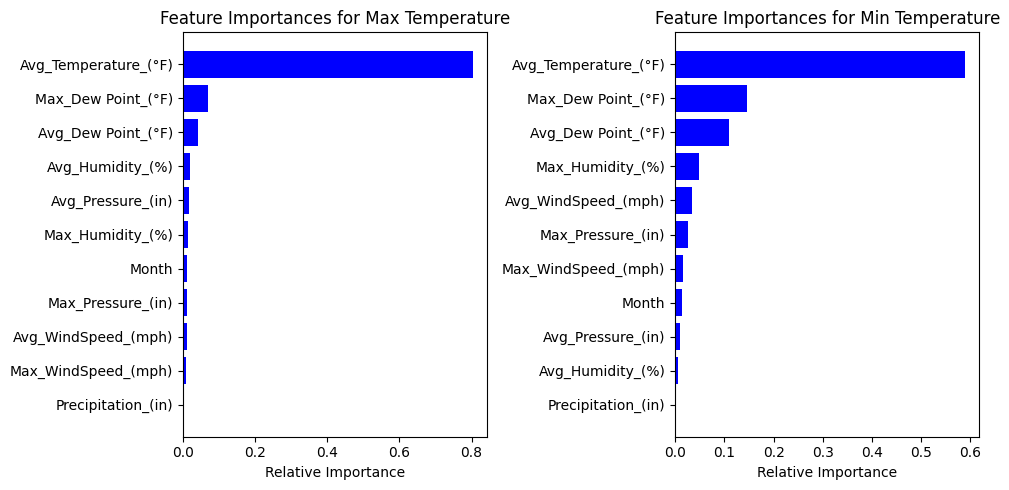

In [16]:
import pandas as pd
import numpy as np

importances_max = model_max.feature_importances_
importances_min = model_min.feature_importances_

indices_max = np.argsort(importances_max)
indices_min = np.argsort(importances_min)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Feature Importances for Max Temperature')
plt.barh(range(len(indices_max)), importances_max[indices_max], color='b', align='center')
plt.yticks(range(len(indices_max)), [features[i] for i in indices_max])
plt.xlabel('Relative Importance')

plt.subplot(1, 2, 2)
plt.title('Feature Importances for Min Temperature')
plt.barh(range(len(indices_min)), importances_min[indices_min], color='b', align='center')
plt.yticks(range(len(indices_min)), [features[i] for i in indices_min])
plt.xlabel('Relative Importance')

plt.tight_layout()
plt.show()

Now let's predict the average temperature using a Random Forest model

In [17]:
# Load the data
data = pd.read_csv('weather_data_2024.csv')

In [18]:
# Prepare the data
X = data.drop(['Date', 'Avg_Temperature_(°F)'], axis=1)
y = data['Avg_Temperature_(°F)']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we can create and train the RandomForestRegressor model

In [20]:
# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.1297409111454608


In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# RMSE values over time
rmse_values = np.random.rand(100)

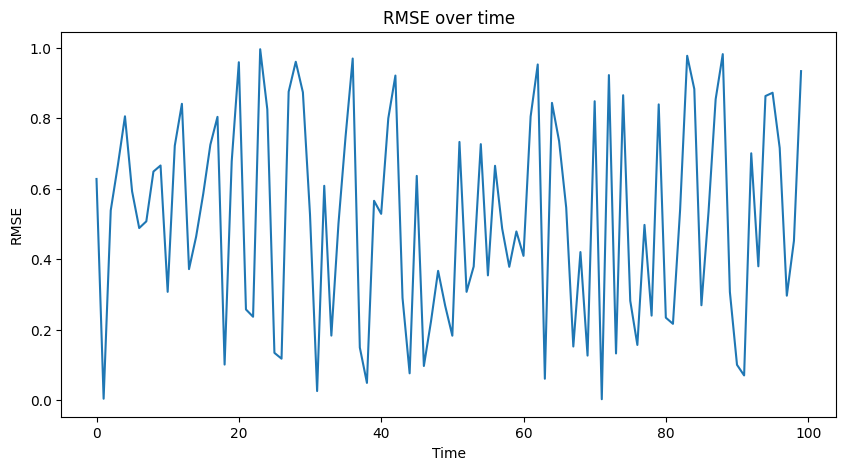

In [26]:
# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(rmse_values)
plt.title('RMSE over time')
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.show()

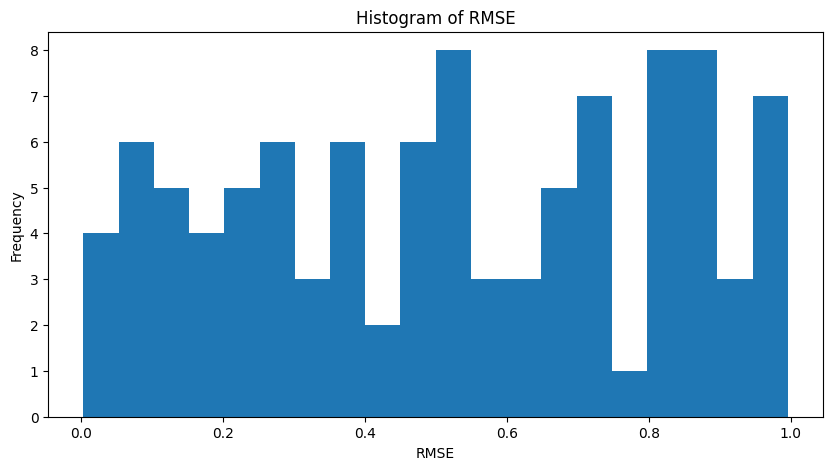

In [27]:
# Histogram
plt.figure(figsize=(10, 5))
plt.hist(rmse_values, bins=20)
plt.title('Histogram of RMSE')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.show()

In [28]:
# For scatter plot and residual plot, We will need actual and predicted values
actual_values = np.random.rand(100)
predicted_values = actual_values + np.random.randn(100) * 0.1

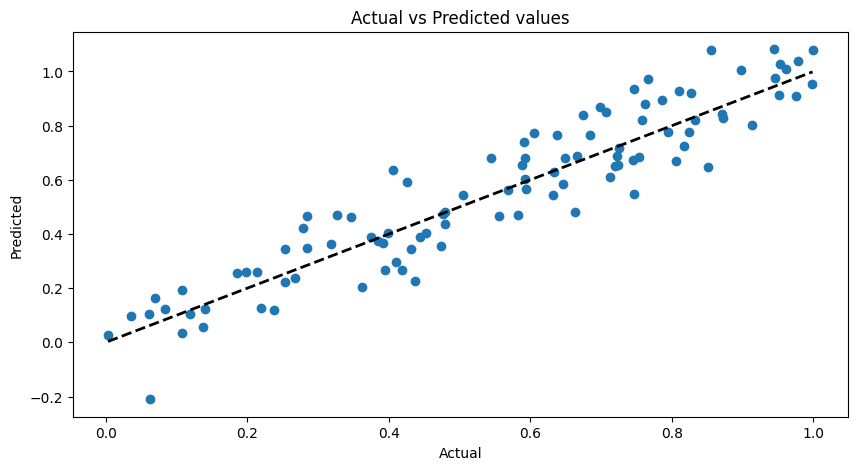

In [29]:
# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(actual_values, predicted_values)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

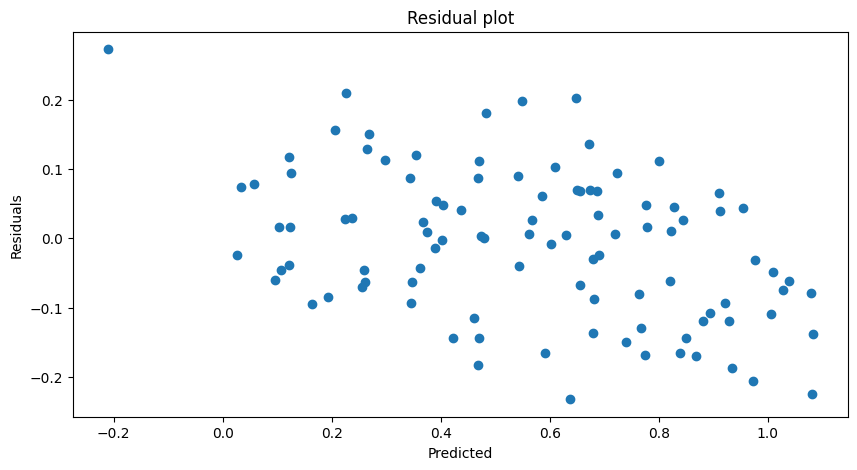

In [30]:
# Residual Plot
residuals = actual_values - predicted_values
plt.figure(figsize=(10, 5))
plt.scatter(predicted_values, residuals)
plt.title('Residual plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()